In [1]:
import sys
sys.path.append("Modules")

from loop import *

INO=Arduino('COM3')

print("Ino conn")

Ino conn


In [2]:
ChnSelect = [True, False, False, True, False, False]
ChnPrefix=['TN4', '', '', 'TP9', '','']
ptype= [False, True, True, True, True, True]

Chn6 measure: False


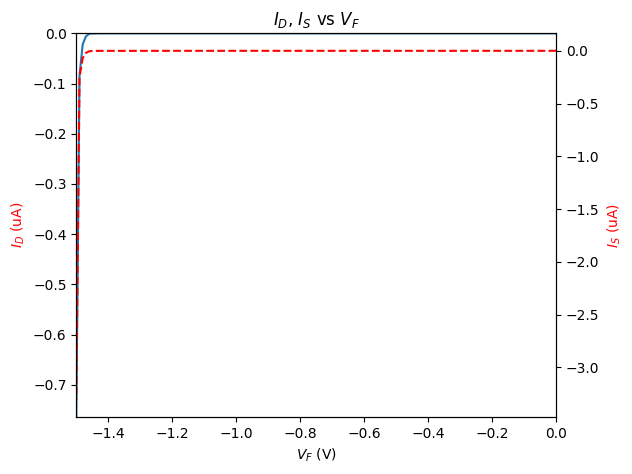

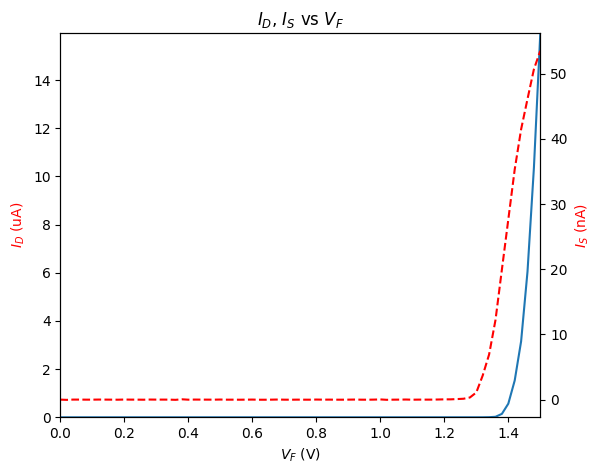

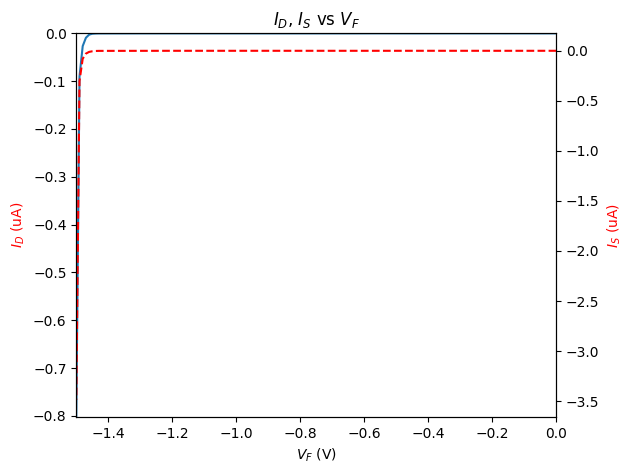

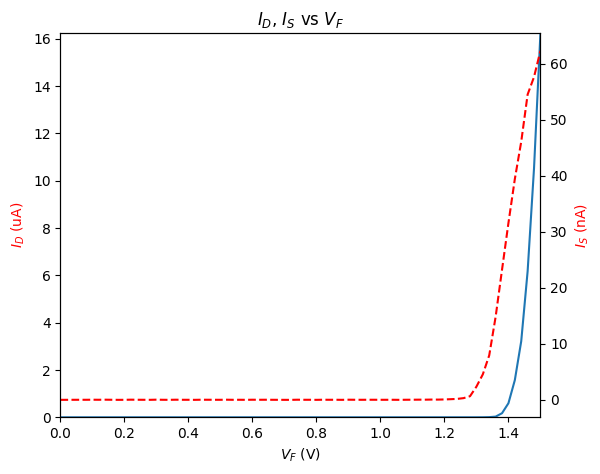

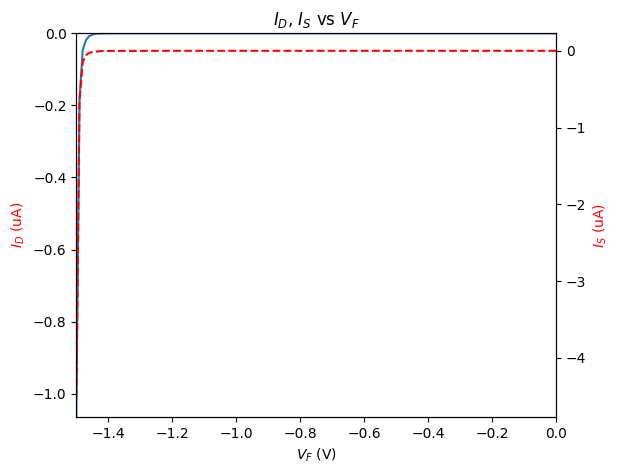

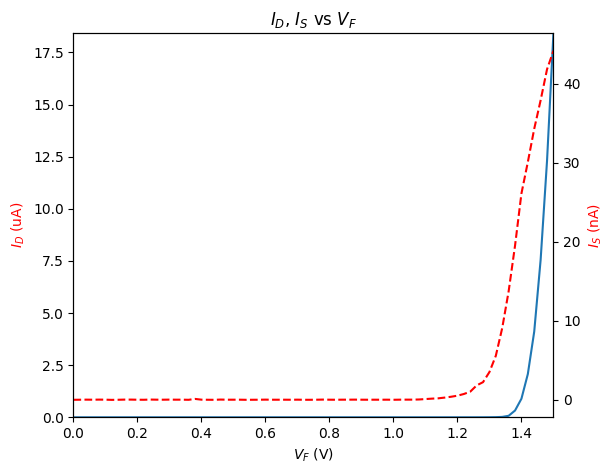

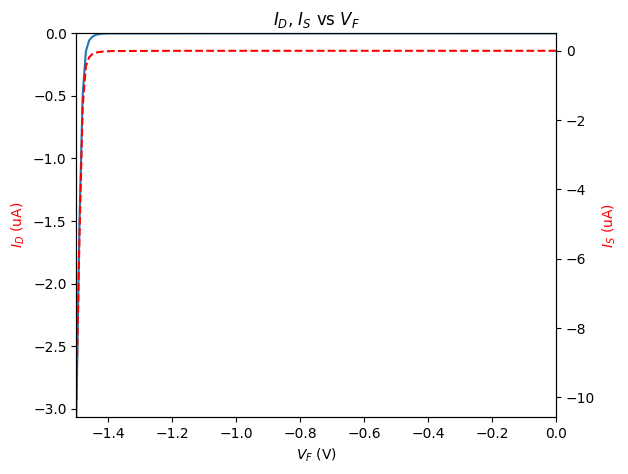

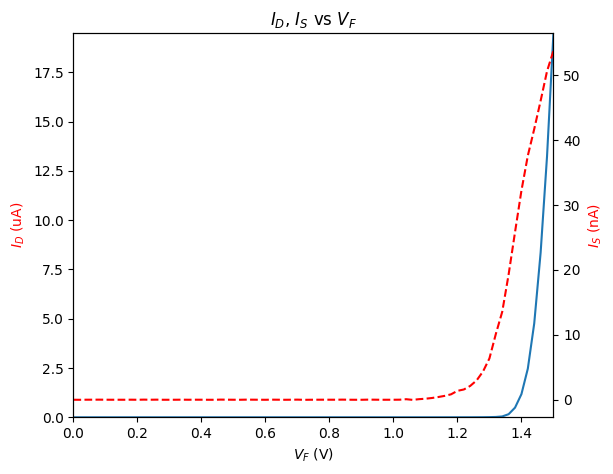

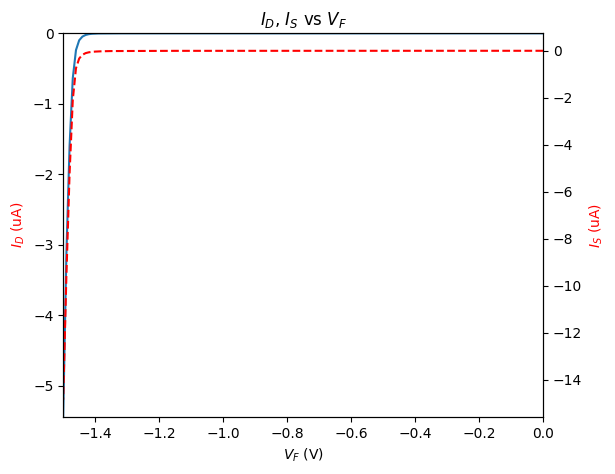

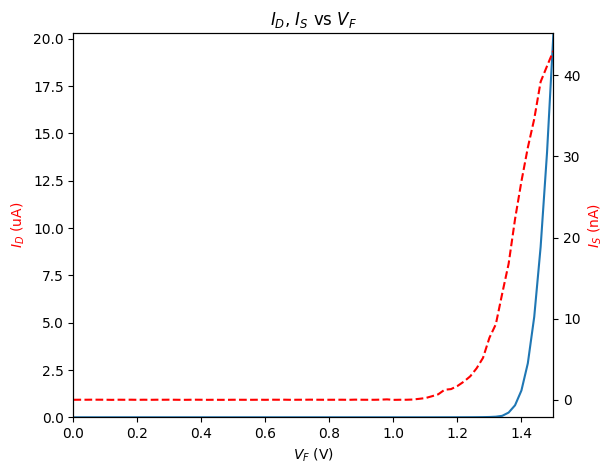

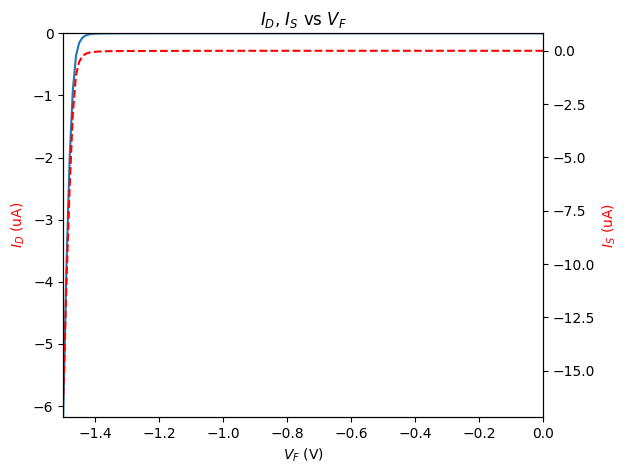

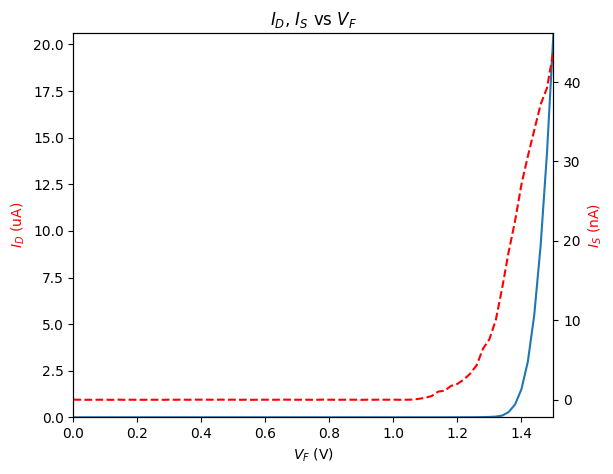

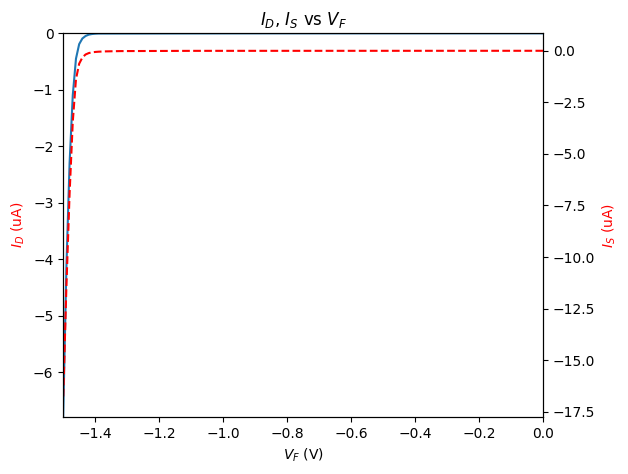

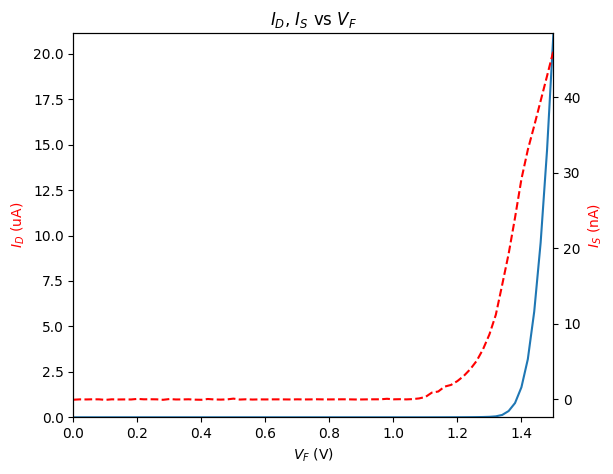

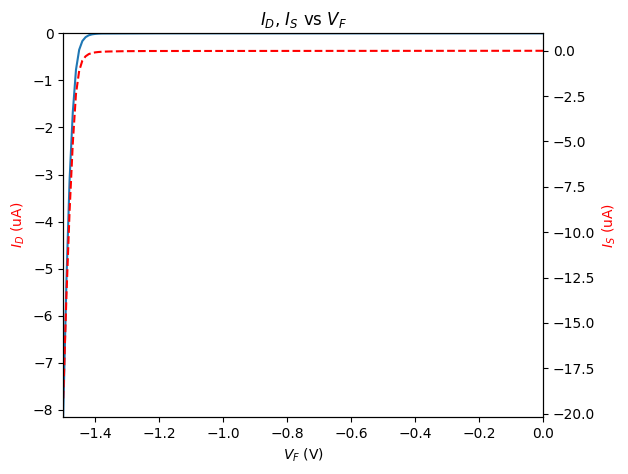

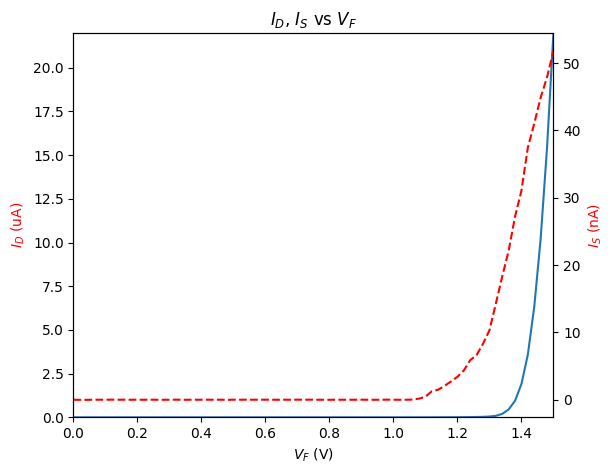

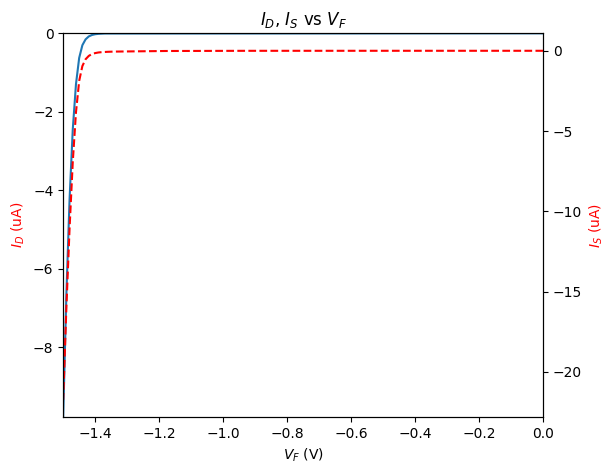

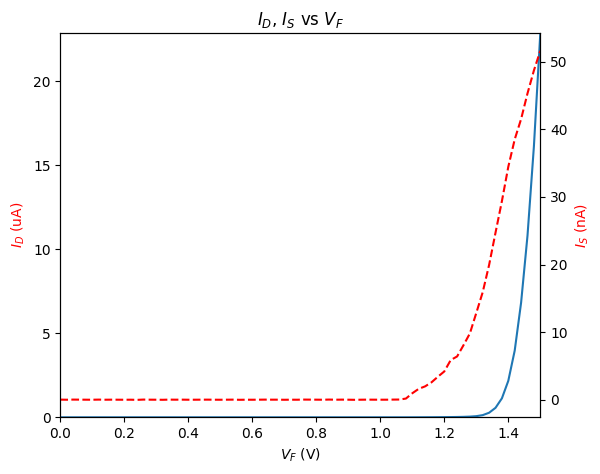

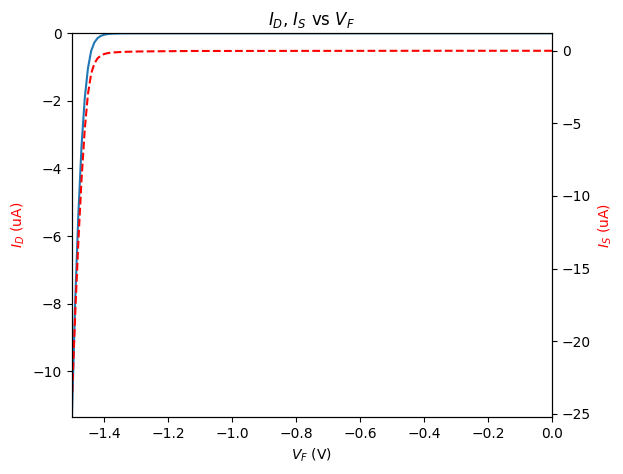

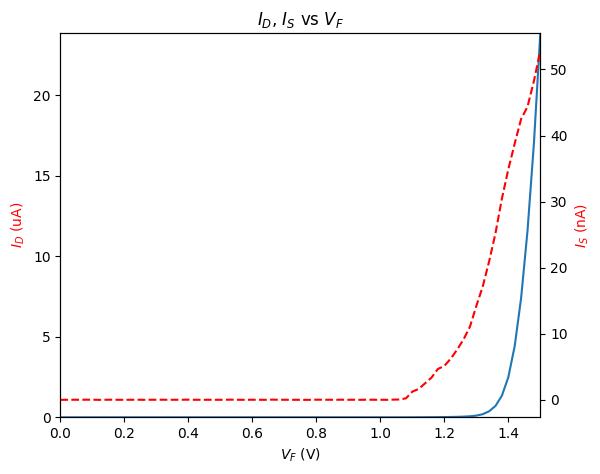

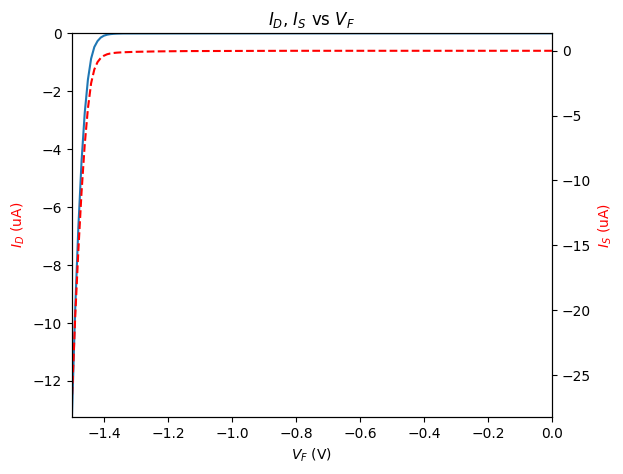

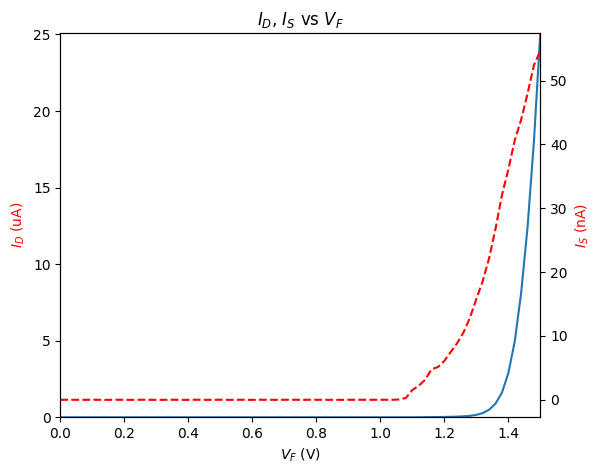

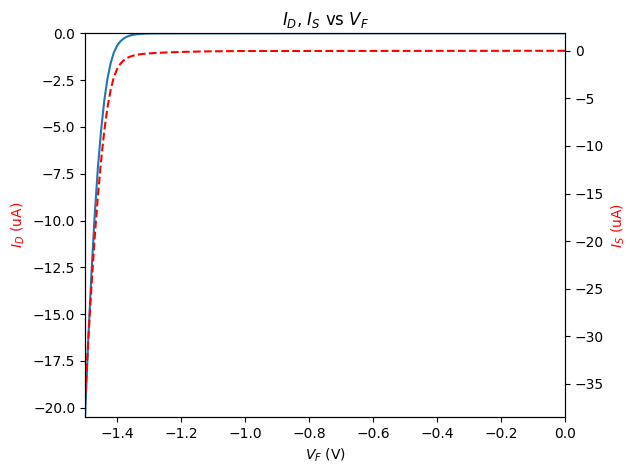

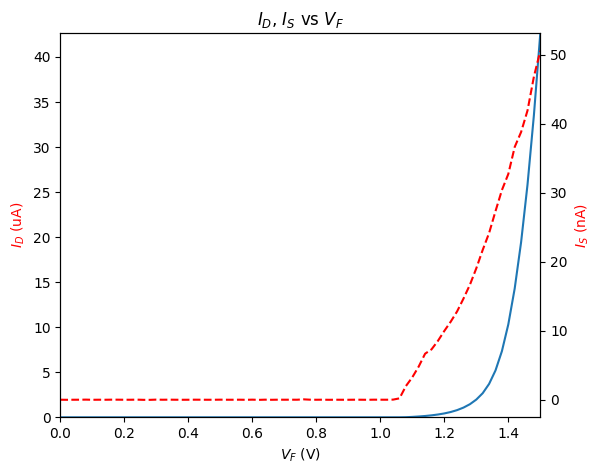

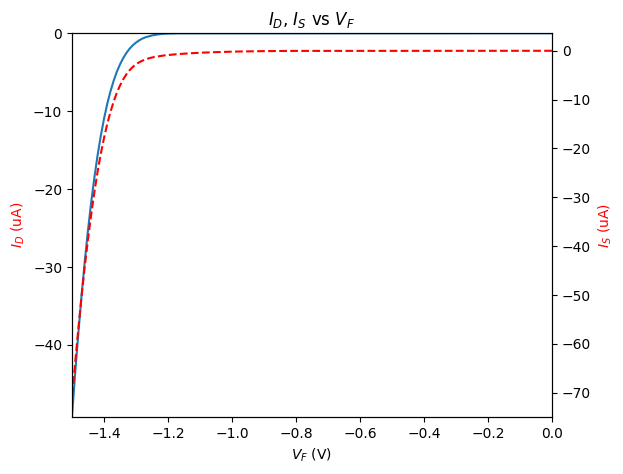

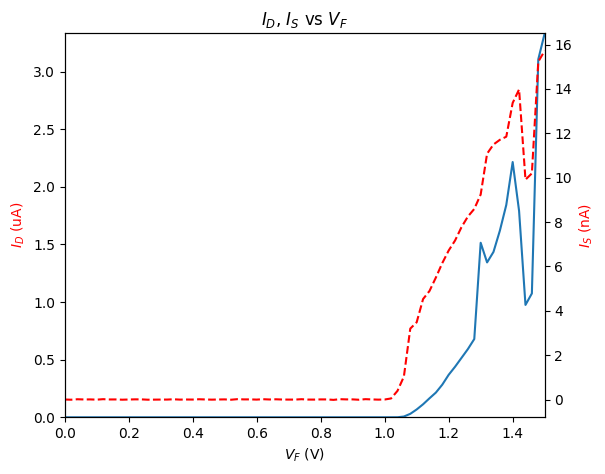

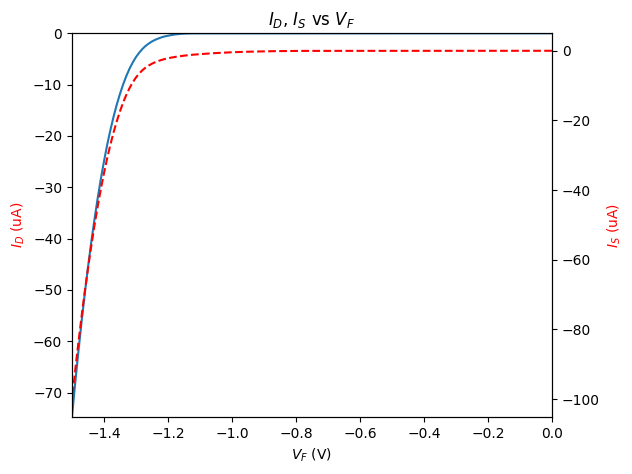

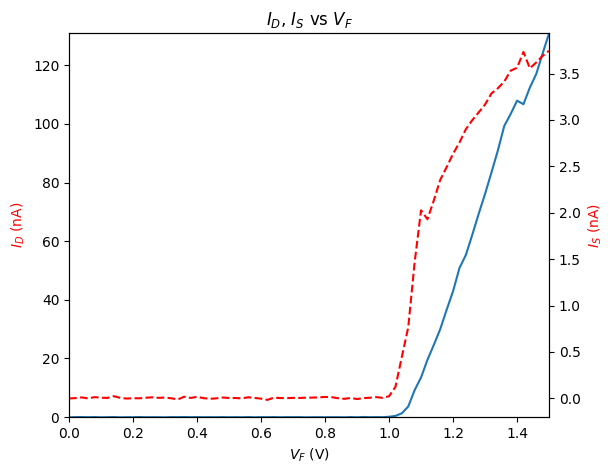

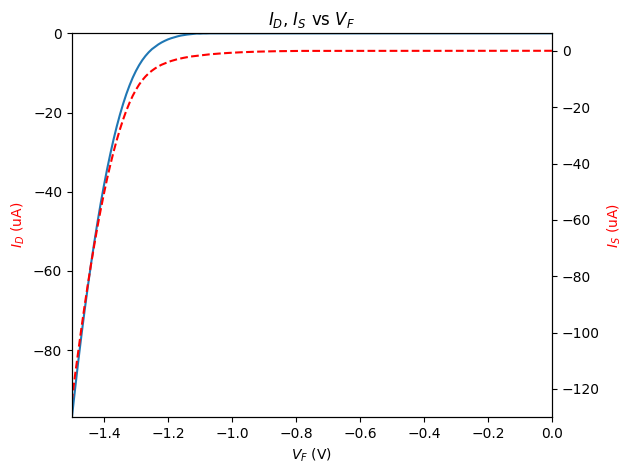

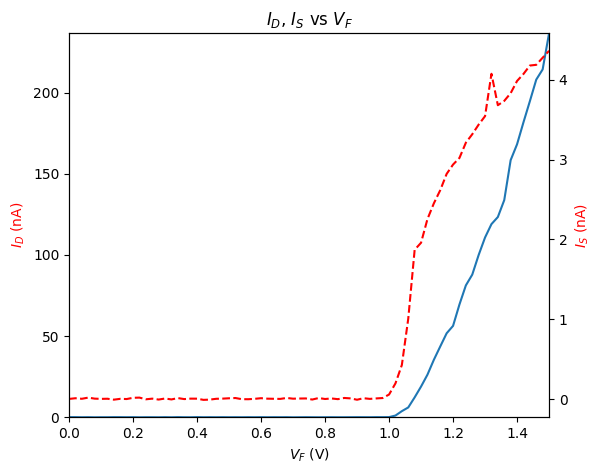

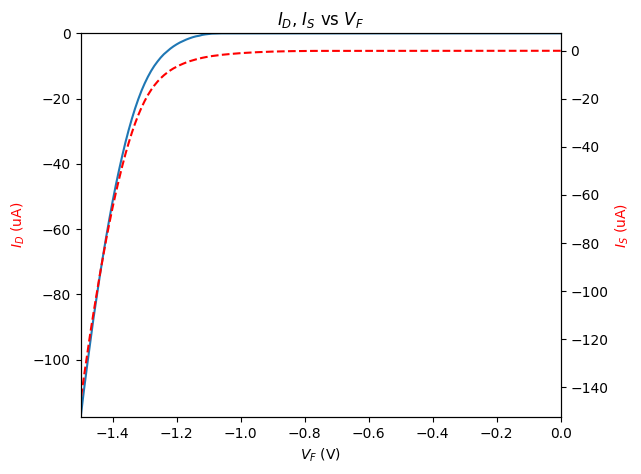

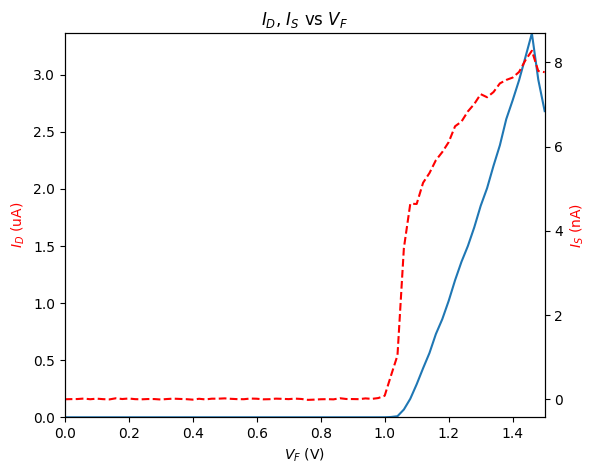

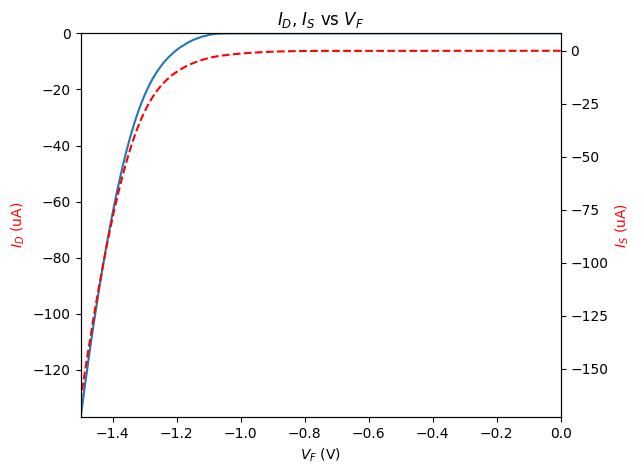

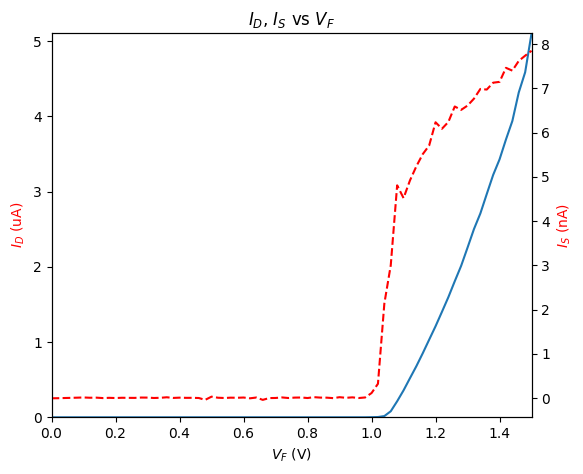

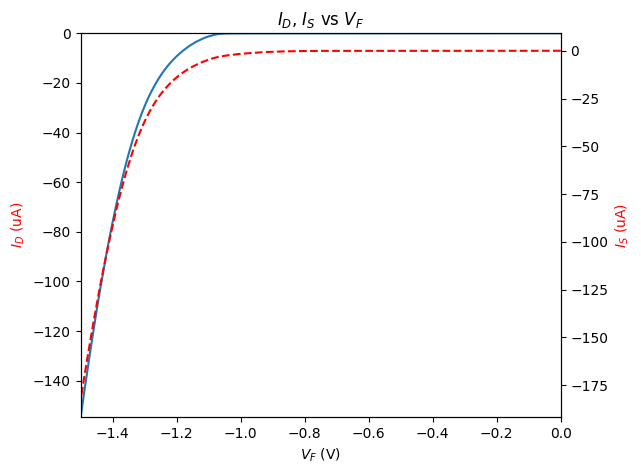

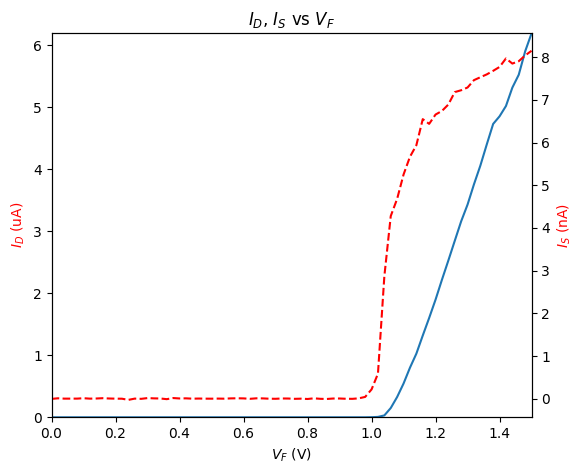

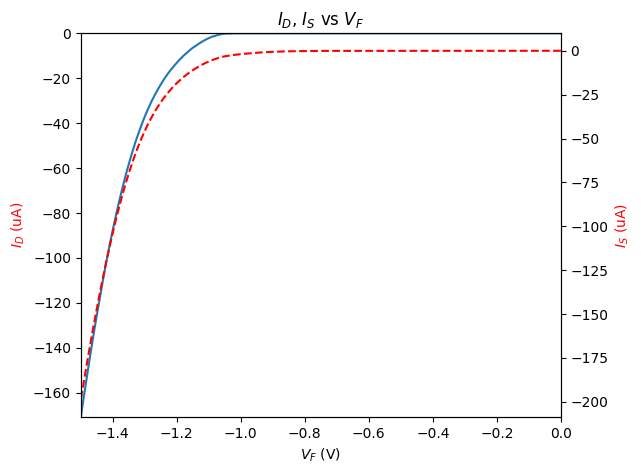

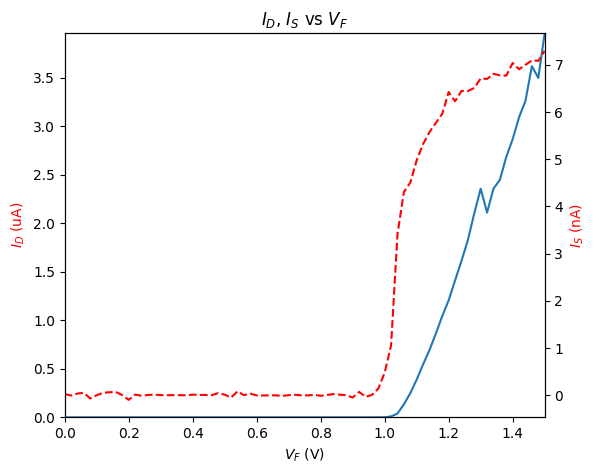

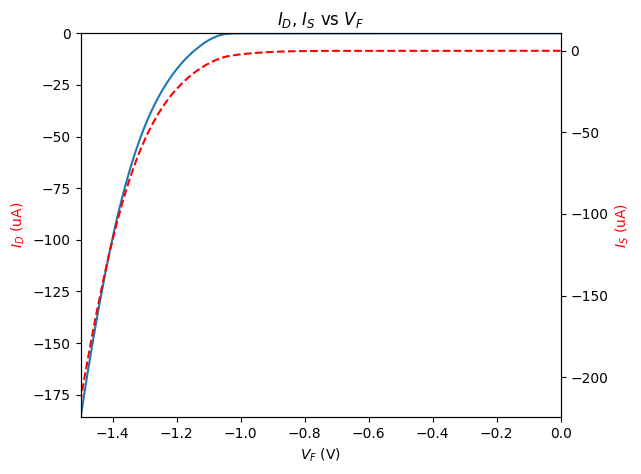

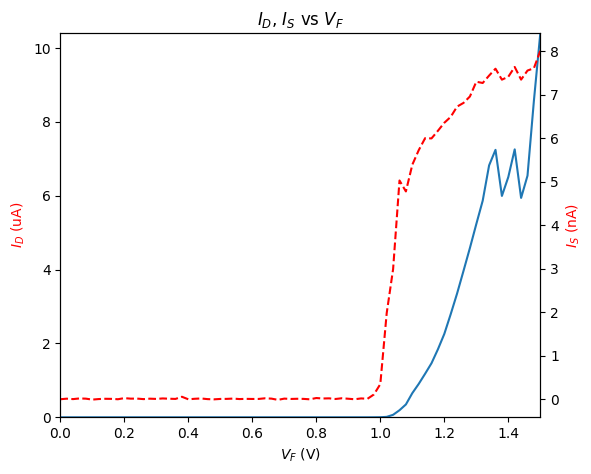

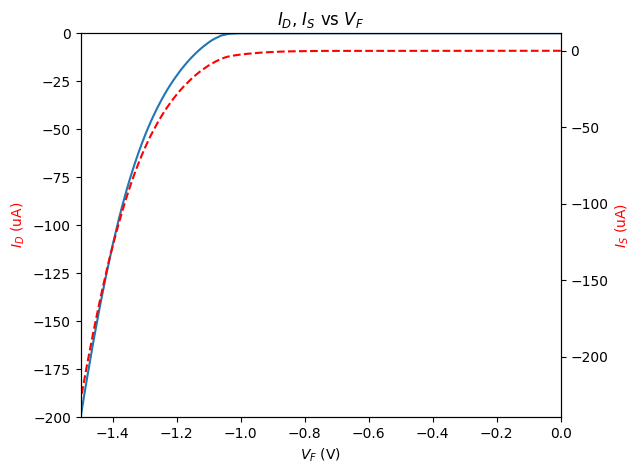

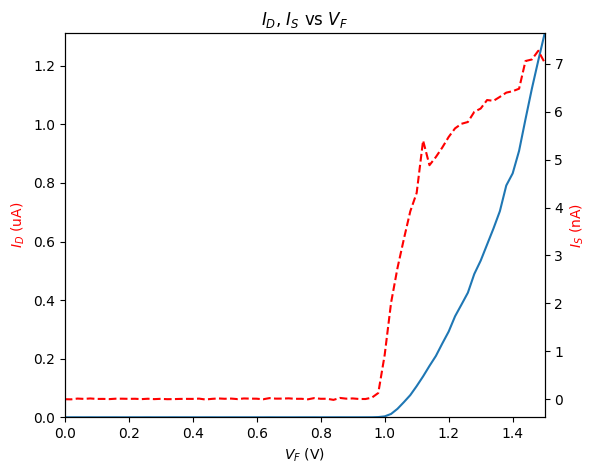

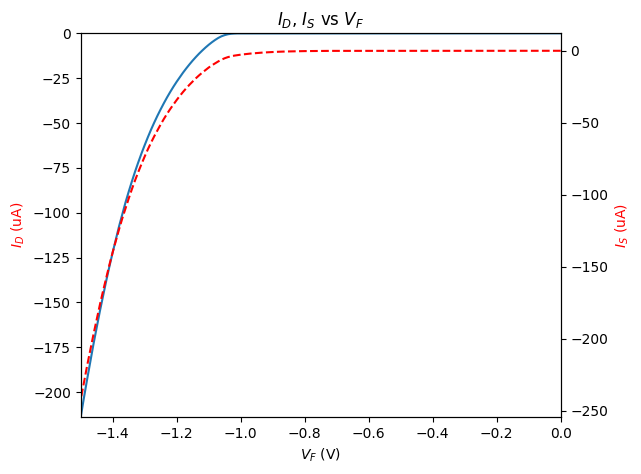

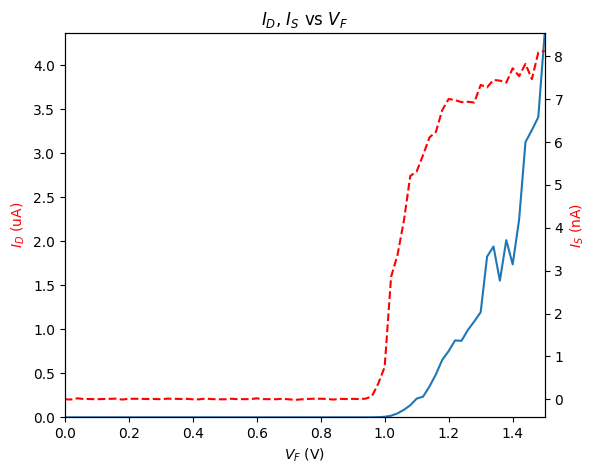

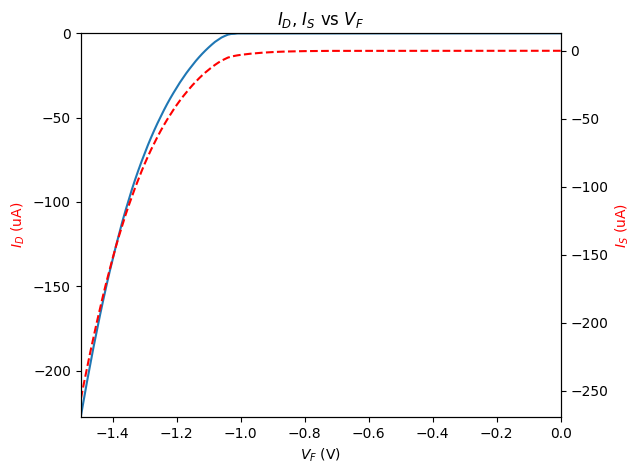

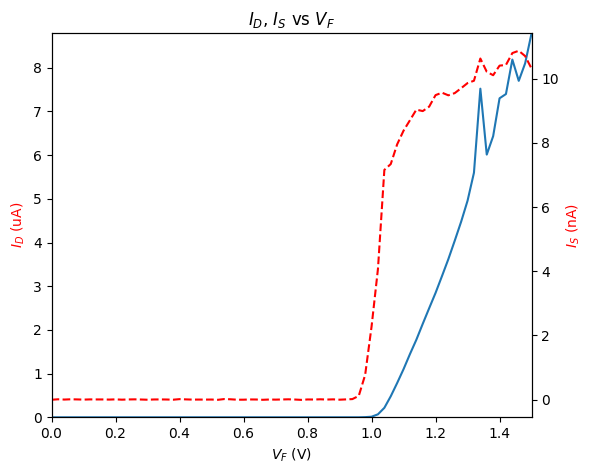

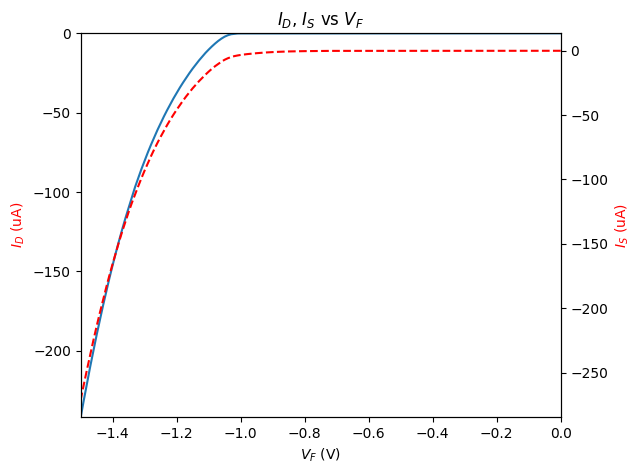

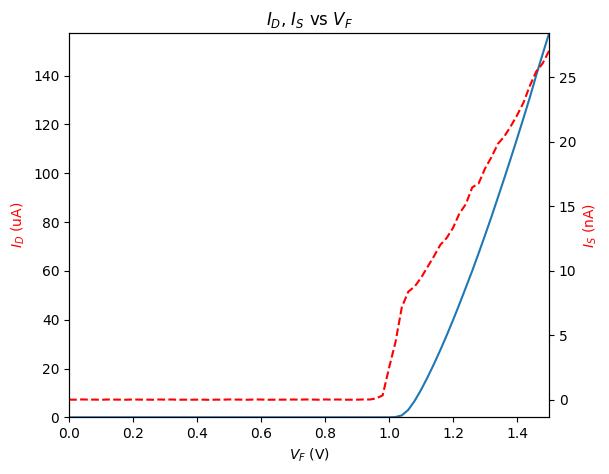

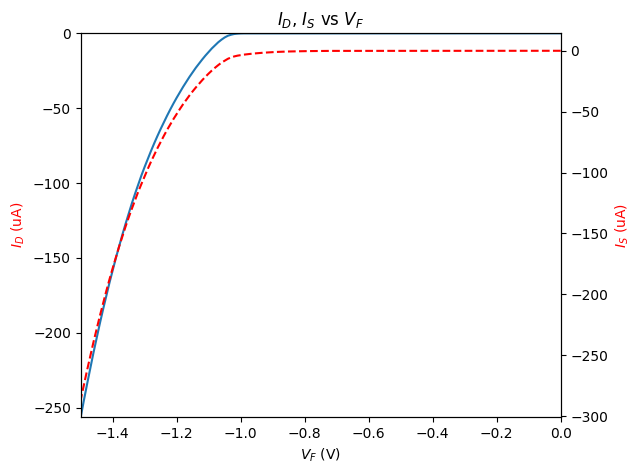

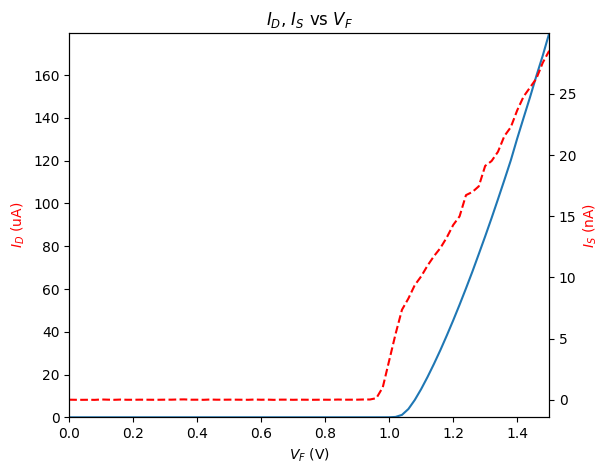

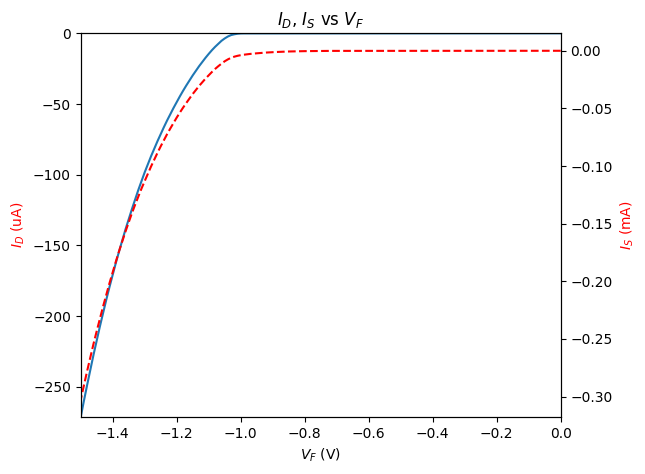

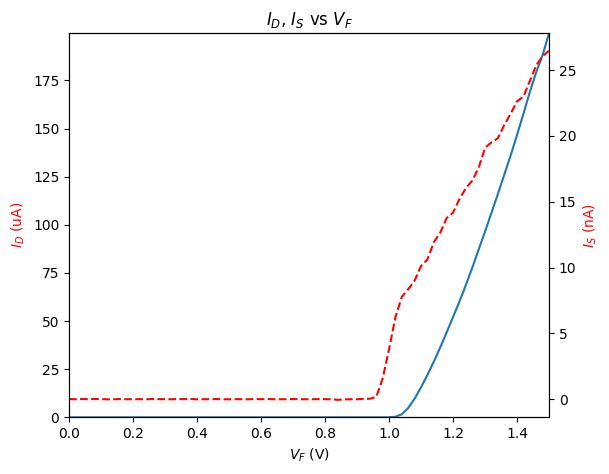

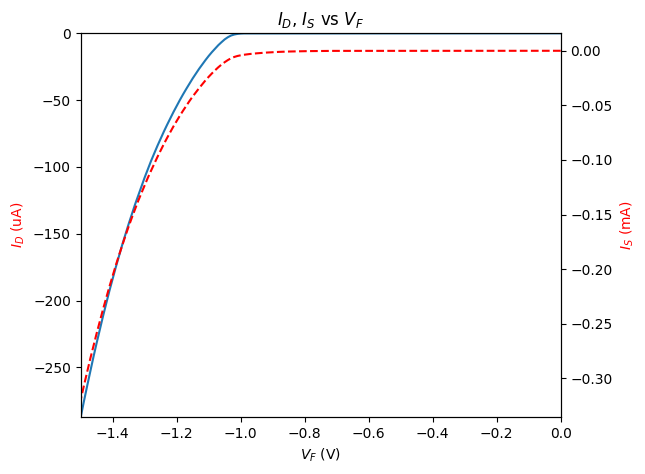

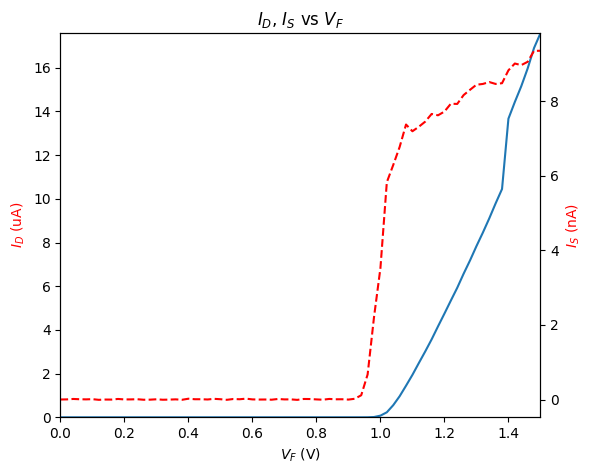

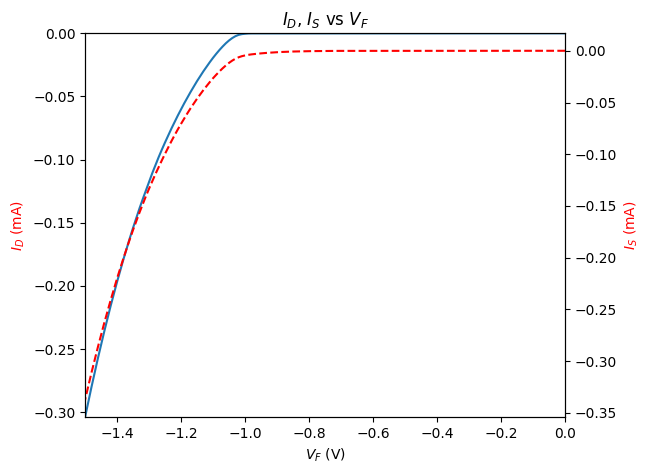

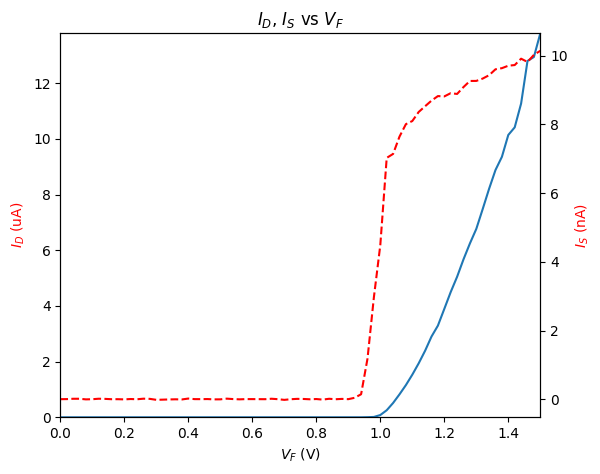

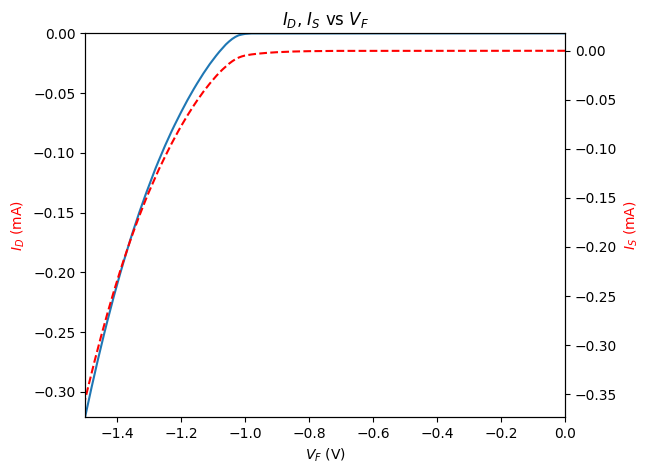

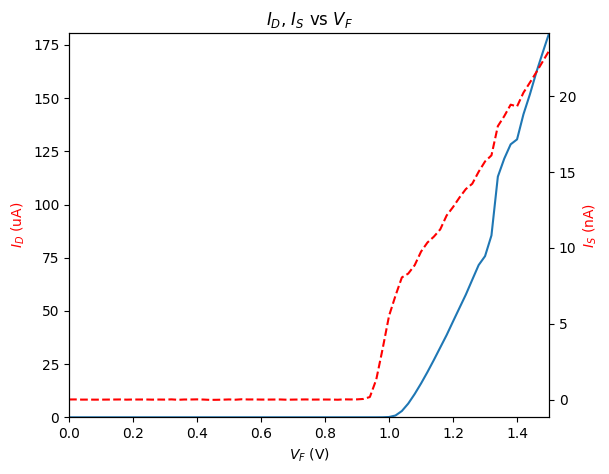

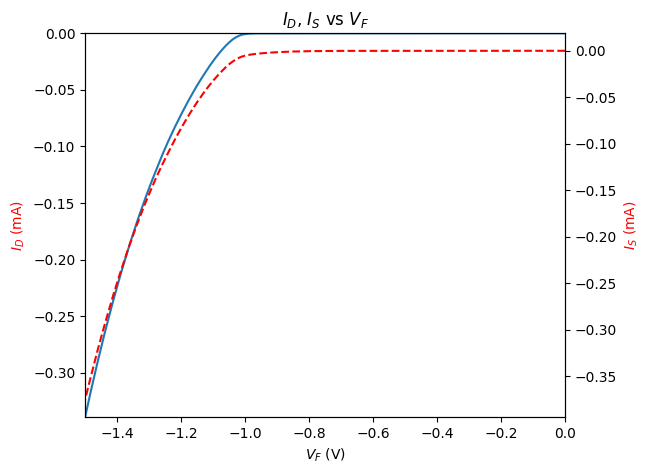

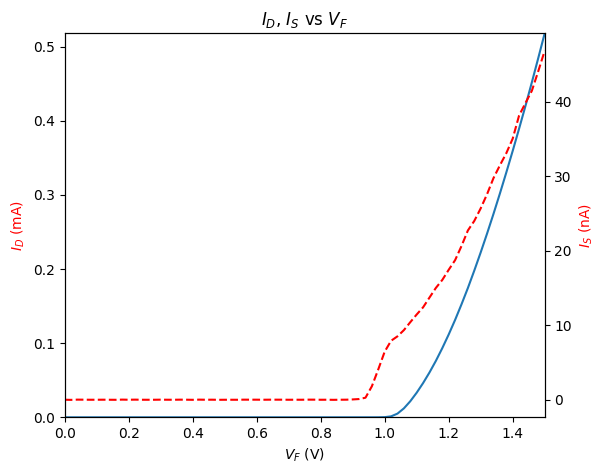

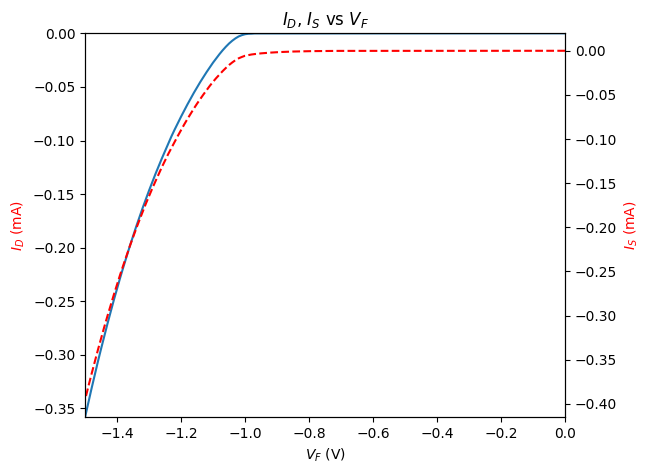

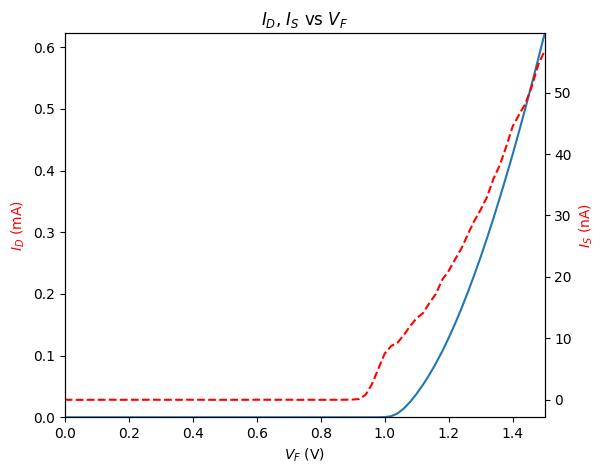

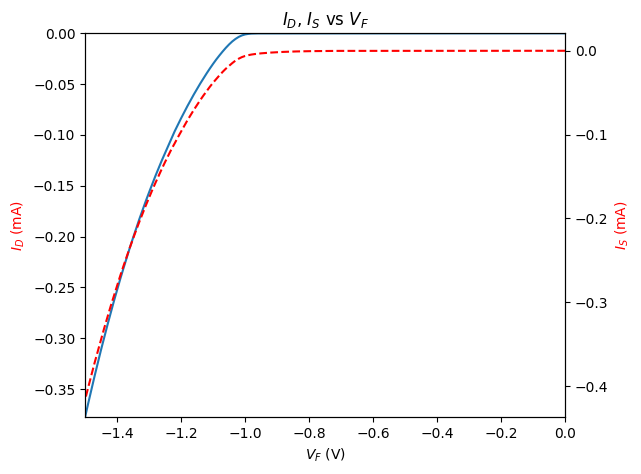

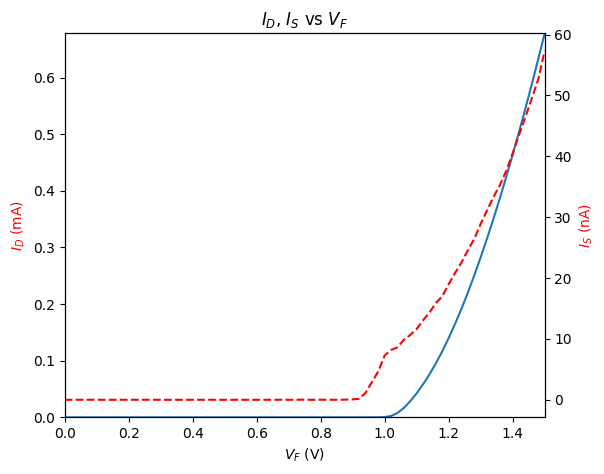

In [4]:
for i in range(32):
    clear_output(wait=True)

    progress="Waiting"

    print(f"Measurement: {i+1}")
    start=datetime.datetime.now().strftime("%y%m%d %H-%M")
    
    for n, Chn in enumerate(ChnSelect):
        clear_output(wait=True)
        print(f"Chn{n+1} measure: {Chn}")
        if Chn:
            printf(f"Measuring {ChnPrefix[n]}, ptype: {ptype[n]}       {datetime.datetime.now().strftime('%y/%m/%d %H:%M:%S')}", start, True)
            INO.opench(n+1)
            loop(ChnPrefix[n], ptype[n], start)
            printf('', start, True)
    
    now=datetime.datetime.now().strftime("%y/%m/%d %H:%M:%S")

Chn6 measure: False
Open INO: ch6


TypeError: HP.Set2P() missing 1 required positional argument: 'Points'

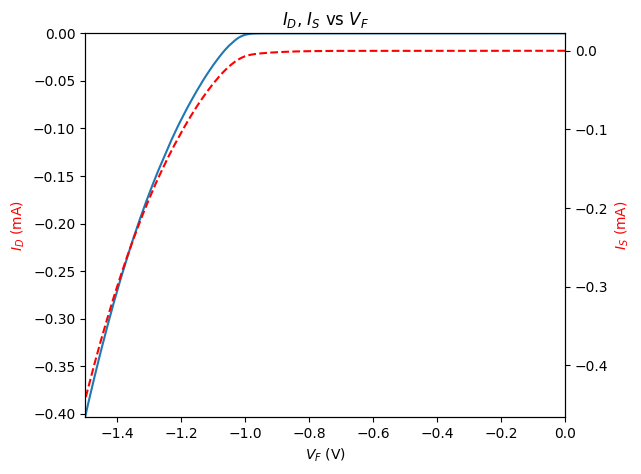

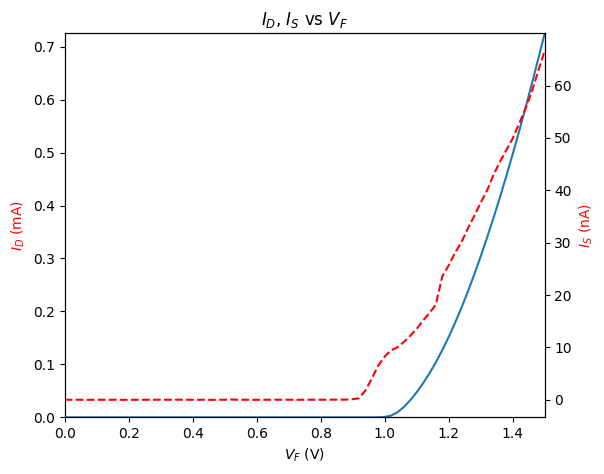

In [5]:
for i in range(32):
    clear_output(wait=True)

    progress="Waiting"
    
    for j in range(60):
        if datetime.datetime.now().time().minute%15 == 0: break
        if j%2==0:
            clear_output(wait=True)
            print(f"Waiting {datetime.datetime.now().strftime('%H:%M')}")
        time.sleep(30)

    print(f"Measurement: {i+1}")
    start=datetime.datetime.now().strftime("%y%m%d %H-%M")
    
    for n, Chn in enumerate(ChnSelect):
        clear_output(wait=True)
        print(f"Chn{n+1} measure: {Chn}")
        if Chn:
            printf(f"Measuring {ChnPrefix[n]}, ptype: {ptype[n]}       {datetime.datetime.now().strftime('%y/%m/%d %H:%M:%S')}", start, True)
            INO.opench(n+1)
            loop(ChnPrefix[n], ptype[n], start)
            printf('', start, True)

    INO.opench(6)
    path=f'C:/Users/Zucchi/Documents/Medidas/Rampup/{time}/short.csv'    
    HP.Set2P(-1e-6, 1e-6, 100)
    HP.SingleSave(path)
    Plot2P(path)
    
    now=datetime.datetime.now().strftime("%y/%m/%d %H:%M:%S")